### Foward Propagation Example
Problem
Suppose we want to predict our test score based on how many hours we sleep and how many hours we study the night before.

In other words, we want to predict output value 
y
 which are scores for a given set of input values 
X
which are hours of (sleep, study).

|X(sleep,study)  |y (test score)| 
|:----------:|:-------------:|
| (3,5) |  75 | 
| (5,1) |   82   | 
| (10,2) | 93 |
| (8,3| ? |

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/raul/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
import numpy as np
X=np.array(([3,5],[5,1],[10,2]),dtype=float)
Y=np.array(([75],[82],[93]),dtype=float)
X=X/np.amax(X,axis=0)
Y=Y/100
class NeuronalNetwork1(object):
    def __init__(self):
        #define Parameters
        self.inputLayerSize=2
        self.hiddenLayerSize=3;
        self.outputLayerSize=1;
        #weights (parameters)
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)
    def fowardPropagation(self,X):
        Z=X@self.W1
        a=self.sigmoid(Z)
        Z2=a@self.W2
        a2=self.sigmoid(Z2)
        return a2
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    

In [6]:
%pylab inline
import matplotlib.pyplot as plt

NN=NeuronalNetwork1()
result=NN.fowardPropagation(X)
#bar([0,1,2],Y, width=0.35,alpha=0.8)
#bar([0.35,1.35,2.35],result,width=0.35,color='r',alpha=0.8)
#grid(1)
#legend(['Y','output'])

Populating the interactive namespace from numpy and matplotlib


# Neuronal Network Implementation

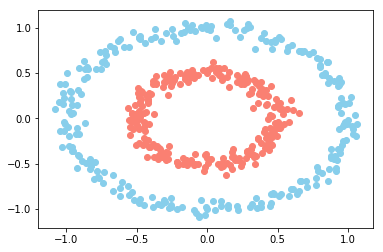

In [7]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

#CREATE DATASET
#tamaño de dataset mas numero de caracteristicas
def createDataSet(datasetSize,featureNumber):
    X,Y=make_circles(n_samples=datasetSize,factor=featureNumber,noise=0.05)
    plt.scatter(X[Y==0,0],X[Y==0,1],c="skyblue")
    plt.scatter(X[Y==1,0],X[Y==1,1],c="salmon")
    #plt.axis("equal")
createDataSet(500,0.5)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.datasets import make_circles
import time
from IPython.display import clear_output
%matplotlib inline 
class neuronalLayer(object):
    def __init__(self,numberConnection,numberNeurons,activationFunction):
        self.numberConnection=numberConnection
        self.numberNeurons=numberNeurons
        self.activationFunction=activationFunction
        self.bayas=np.random.rand(1,numberNeurons)*2-1#inicializacion con random
        self.W=np.random.rand(numberConnection,numberNeurons)*2-1#inicializacion con random
class NeuronalNetwork(object):
    def __init__(self,learningRatio=0.1,numIterations=100,topology=[4,4,1],train=True):
        self.learningRatio=learningRatio
        self.numIterations=numIterations
        self.topology=topology
        self.neuronalNetrowk=[]
        self.train=train
    sigmoide=(lambda x:1/(1+np.e**(-x)),lambda x:x*(1-x)) #funcion de activacion mas su rerivada
    costFunction=(lambda yp,yr:np.mean((yp-yr)**2),
                 lambda yp,yr:(yp-yr))#funcion de costo mas su rerivada
    def createNeuronalNetwork(self):
        nn=[]
        for i,layer in enumerate(self.topology[:-1]):
            nn.append(neuronalLayer(self.topology[i],self.topology[i+1],self.sigmoide))
        self.neuronalNetrowk=nn
    def forwardPropagation(self,X,Y):
        out=[(None,X)]
        for i,layer in enumerate(self.neuronalNetrowk):
            z=out[-1][1]@self.neuronalNetrowk[i].W +self.neuronalNetrowk[i].bayas
            a=self.neuronalNetrowk[i].activationFunction[0](z)
            out.append((z,a))
        return out
    def backwardPropagation(self,X,Y):
        out=self.forwardPropagation(X,Y)
        if self.train:
            deltas=[]
            for i in reversed(range(0, len(self.neuronalNetrowk))):
                z=out[i+1][0]
                a=out[i+1][1]
                if i==len(self.neuronalNetrowk)-1:
                    deltas.insert(0,self.costFunction[1](a,Y)*self.neuronalNetrowk[i].activationFunction[1](a))
                else:
                    deltas.insert(0, deltas[0] @ _W.T * self.neuronalNetrowk[i].activationFunction[1](a))
                _W=self.neuronalNetrowk[i].W
                ##gradient desent
                self.neuronalNetrowk[i].bayas=self.neuronalNetrowk[i].bayas-np.mean(deltas[0],axis=0,keepdims=True)*self.learningRatio
                self.neuronalNetrowk[i].W=self.neuronalNetrowk[i].W-out[i][1].T@deltas[0]*self.learningRatio
        return out[-1][1]
    def fit(self,X,Y,numIterations):
        loss=[]
        for i in range(numIterations):
            out=self.backwardPropagation(X,Y)
            loss.append(self.costFunction[0](out,Y))
            clear_output(wait=True)
            plt.plot(range(len(loss)), loss)
            plt.show()
  

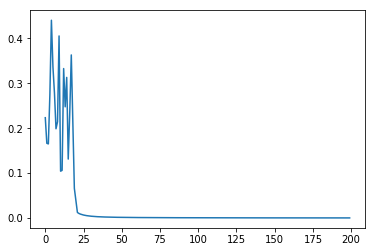

In [8]:

def readData():
    df = pd.read_csv('Iris.csv')   
    df = df.drop(['Id'],axis=1)
    rows = list(range(100,150))
    df = df.drop(df.index[rows]) 
     
    Y = []
    target = df['Species']
    for val in target:
        if(val == 'Iris-setosa'):
            Y.append(0)
        else:
            Y.append(1)
         
    df = df.drop(['Species'],axis=1)
    X = df.values.tolist()
    X, Y = shuffle(X,Y)
    X=np.array(X)
    Y=np.array(Y)
    Y=Y[:,np.newaxis]
    return X,Y
def createDataSet(datasetSize,featureNumber):
    X,Y=make_circles(n_samples=datasetSize,factor=featureNumber,noise=0.05)
    Y=Y[:,np.newaxis]
    plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")  
    #plt.axis("equal")
    return X,Y
def testNeuronalNetwork():
    [X,Y]=createDataSet(500,0.5)
    neuro=NeuronalNetwork()
    neuro.createNeuronalNetwork()
    neuro.fit(X,Y)
if __name__=='__main__':
    [X,Y]=readData()
    heatmap_plot = sns.heatmap(X, center=0, cmap='gist_ncar')
    plt.show() 
    neuro=NeuronalNetwork(learningRatio=0.1,topology=[4,12,1])
    neuro.createNeuronalNetwork()    
    neuro.fit(X,Y,200)

# Neural Network
###  forwardPropagation
$$\alpha$$
### backward Propagation
sea la siguiente composicion de funciones:
$$C(a(z^{L}))$$
donde $C$ es la funcion conste definida como:
$$C(a_{j}^{L})=\frac{1}{2}\sum_{j}^{}(y_{i}-a_{j}^{L})^{2}$$
$a$ la funcion de activacion:
$$a^{L}(z^{L})=\frac{1}{1+e^{-z^{L}}}$$
y $z$ la suma ponderada:
$$z^{L}=\sum_{i}^{}a_{i}^{L-1}w_{i}^{L}+b^{L}$$

#### Como varia el $coste$ ante un cambio del parametro $W$?
el parametro w esta conformado por w y el b
$$\frac{\partial C}{\partial w^{L}}=\frac{\partial C}{\partial a^{L}}*\frac{\partial a^{L}}{\partial z^{L}}*\frac{\partial z^{L}}{\partial w^{L}}$$
$$\frac{\partial C}{\partial b^{L}}=\frac{\partial C}{\partial a^{L}}*\frac{\partial a^{L}}{\partial z^{L}}*\frac{\partial z^{L}}{\partial b^{L}}$$
Ahora resolvemos esas derivadas parciales:
derivada del coste con respecto al la funcion de activacion:
$$\frac{\partial C}{\partial a^{L}}=(a_{j}^{L}-y_{j})$$
derivada de la funcion de activacion con respecto a la suma ponderada:
$$\frac{\partial a^{L}}{\partial z^{L}}=a^{L}(z^{L})*(1-a^{L}(z^{L}))$$
derivada de la suma ponderada con respecto a w:
$$\frac{\partial z^{L}}{\partial b^{L}}=a_{i}^{L-1}$$
derivada de la suma ponderada con respecto a b:
$$\frac{\partial z^{L}}{\partial w^{L}}=1$$

### Algoritmo de Backpropagation
1. Computo del error de la ultima capa
    $$\delta^{L}=\frac{\partial C}{\partial a^{L}}*\frac{\partial a^{L}}{\partial z^{L}}$$
2. Retropropagamos el error a la capa anterior
    $$\delta^{L-1}=W^{L}*\delta^{L}*\frac{\partial a^{L-1}}{\partial z^{L-1}}$$
3. calculamos las derivadas de la capa usando el error
    $$\frac{\partial C}{\partial b^{L-1}}=\delta^{L-1}$$
    $$\frac{\partial C}{\partial w^{L-1}}=\delta^{L-1}*a^{L-2}$$

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.datasets import make_circles
import time
from IPython.display import clear_output
%matplotlib inline
class NeuralLayer(object):#clase capa neuronal
    def __init__(self,numberConections,numberNeurons,activationFunction):
        self.numberConections=numberConections
        self.numberNeurons=numberNeurons
        self.activationFunction=activationFunction
        self.bayas=np.random.rand(1,numberNeurons)*2-1#inicializacion con random
        self.W=np.random.rand(numberConections,numberNeurons)*2-1#inicializacion con random    
class NeuralNetwork:
    def __init__(self,learningRatio=0.01,train=True,numIterations=1000,topology=[4,3,1]):
        self.learningRatio=learningRatio
        self.train=train
        self.numIterations=numIterations
        self.topology=topology
        self.neuralNetwork=self.createNeuralNetwork()
    def createNeuralNetwork(self):
        nn=[]
        for i,layer in enumerate(self.topology[:-1]):#itera hasta len(topology)-1
            nn.append(NeuralLayer(self.topology[i],self.topology[i+1],self.sigmoide))#crea un objeto neuralLayer
        return nn
    sigmoide=(lambda x:1/(1+np.e**(-x)),lambda x:x*(1-x)) #funcion de activacion mas su rerivada
    costFunction=(lambda yp,yr:np.mean((yp-yr)**2),
                 lambda yp,yr:(yp-yr))#funcion de costo mas su rerivada
    def forwardPropagation(self,X,Y):
        out=[(None,X)]#tupla None,X 
        for i,layer in enumerate(self.neuralNetwork):
            z=out[-1][1]@self.neuralNetwork[i].W+self.neuralNetwork[i].bayas
            a=self.neuralNetwork[i].activationFunction[0](z)
            out.append((z,a))#se agrega una nueva tupla confotmado de (z,a) donde z es la suma ponderada
                             #y a es resultado de pasar z como parametro por la funcion de activacion   
        return out 
    def backPropagation(self,X,Y):
        out=self.forwardPropagation(X,Y)
        if self.train:
            deltas=[]
            for i in reversed(range(0, len(self.neuralNetwork))):
                a=out[i+1][1]
                z=out[i+1][0]
                if i==len(self.neuralNetwork)-1:#para la ultima capa
                    deltas.insert(0,self.costFunction[1](a,Y)*self.neuralNetwork[i].activationFunction[1](a))
                else:#para las demas capas
                    deltas.insert(0, deltas[0] @ _W.T * self.neuralNetwork[i].activationFunction[1](a))
                _W=self.neuralNetwork[i].W
                ##desenso del gradiente
                self.neuralNetwork[i].bayas=self.neuralNetwork[i].bayas-np.mean(deltas[0],axis=0,keepdims=True)*self.learningRatio
                self.neuralNetwork[i].W=self.neuralNetwork[i].W-out[i][1].T@deltas[0]*self.learningRatio
        return out[-1][1]
    def fit(self,X,Y,numIterations):
        loss=[]
        for i in range(numIterations):
            out=self.backwardPropagation(X,Y)
            loss.append(self.costFunction[0](out,Y))
            clear_output(wait=True)
            plt.plot(range(len(loss)), loss)
            plt.show()
def readData():
    df = pd.read_csv('Iris.csv')   
    df = df.drop(['Id'],axis=1)
    rows = list(range(100,150))
    df = df.drop(df.index[rows]) 
     
    Y = []
    target = df['Species']
    for val in target:
        if(val == 'Iris-setosa'):
            Y.append(0)
        else:
            Y.append(1)
    df = df.drop(['Species'],axis=1)
    X = df.values.tolist()
    X, Y = shuffle(X,Y)
    X=np.array(X)
    Y=np.array(Y)
    Y=Y[:,np.newaxis]
    return X,Y
if __name__=='__main__':
    nn=NeuralNetwork()
    [X,Y]=readData()
    nn.backPropagation(X,Y)